# The Assemble Module

The `assemble` module of the `mirah` package finds and forms the essential structure components. These 
components are the smallest building blocks that form the basis for every repeat in the song. The functions in this module ensure each time step of a song is contained in at most one of the song's essential  structure component by making none of the repeats overlap in time. When repeats do overlap, these repeats undergo a process 
where they are divided until there are only non-overlapping pieces left over. The following functions are exported from the `assemble` modeule:

- **breakup_overlaps_by_intersect**: Extracts repeats in *input\_pattern\_obj* that has the starting indices of the repeats, into the essential structure componets using *bw\_vec*, that has the lengths of each repeat.
    
- **check_overlaps**: Compares every pair of groups, determining if there are any repeats in any pairs of the groups that overlap. 

- **hierarchical\_structure**: Distills the repeats encoded in *matrix\_no\_overlaps* (and *key\_no\_overlaps*) to the essential structure components and then builds the hierarchical representation. Also optionally outputs visualizations of the hierarchical representations.

This module uses `find_all_repeats` from the [`search`](./search_vignette.ipynb) module and `reconstruct_full_block` from the [`utilities`](./utilities_vignette.ipynb) module. 

For more in depth information on the function calls, an example function pipeline is shown below. Functions from the current module are shown in <font color='indianred'>red</font>.

<img src="pictures/function_pipeline.jpg" width="400">


## Import Modules

In [1]:
# NumPy is used for mathematical calculations
import numpy as np

# Import other modules
from inspect import signature 

# Import assemble
import sys, os
current_dir = os.path.dirname(os.path.realpath('__file__'))
relative_path = os.path.join(current_dir, '..')
sys.path.append(relative_path)
from mirah.assemble import *

## breakup_overlaps_by_intersect 

The purpose of this function is to create the essential structure components matrix. The essential structure components contain the smallest building blocks that form every repeat in the song. This matrix is created using the *input\_pattern\_object*, that has the starting indices of the repeats and a vector, *bw\_vec*, that has the lengths of each repeats. 
 
The inputs for this function are: 
- **input_pattern_obj** (np.ndarray): A binary matrix with 1's where repeats begin and 0's otherwise
-  **bw_vec** (np.ndarray): Lengths of the repeats encoded in *input\_pattern\_obj*
- **thresh_bw** (int): The smallest allowable repeat length 

The outputs for this function are: 
- **pattern_no_overlaps** (np.ndarray): A binary matrix with 1's where repeats of essential structure components begin 
- **pattern_no_overlaps_key** (np.ndarray): A vector containing the lengths of the repeats of essential structure components in *pattern\_no\_overlaps* 

In [2]:
input_pattern_obj = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                              [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])
bw_vec = np.array([[3],
                   [5],
                   [8],
                   [8]])
thresh_bw = 0
print("The input array is: \n", input_pattern_obj)
print("The lengths of the repeats in the input array is: \n", bw_vec)
print("The smallest allowable repeat length is: ", thresh_bw)

The input array is: 
 [[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
The lengths of the repeats in the input array is: 
 [[3]
 [5]
 [8]
 [8]]
The smallest allowable repeat length is:  0


In [3]:
output = breakup_overlaps_by_intersect(input_pattern_obj, bw_vec, thresh_bw)

print("The output array is: \n", output[0])
print("The lengths of the repeats in the output array is: \n", output[1])

The output array is: 
 [[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
The lengths of the repeats in the output array is: 
 [[3]
 [5]]


## check_overlaps

This function compares every pair of groups and checks for overlaps between those pairs. To check every pair of groups, the function creates *compare\_left* and *compare\_right*. *compare\_left* repeats each row the number of rows times, and _compare\_right_ repeats the whole input the number of rows times times. By comparing each corresponding time step in *compare\_left* and *compare\_right*, it determines if there are any overlaps between groups.

The input for this function is: 

- **input_mat** (np.ndarray): An array waiting to be checked for overlaps

The output for this function is: 
- **overlaps\_yn** (np.ndarray): A logical array where (i,j) = 1 if row i of input matrix and row j of input matrix overlap and (i,j) = 0 elsewhere

In [4]:
input_mat = np.array([[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                      [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                      [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]])

print("The input array waiting to be checked for overlaps is: \n", input_mat)

The input array waiting to be checked for overlaps is: 
 [[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1]]


In [5]:
output = check_overlaps(input_mat)

print("The output logical array is: \n", output)

The output logical array is: 
 [[False  True  True  True]
 [False False  True  True]
 [False False False False]
 [False False False False]]


##  hierarchical\_structure

This function distills the repeats encoded in matrix\_no\_overlaps (and key\_no\_overlaps), which are the outputs from the remove\_overlaps function from the transform module, to the essential structure components and then builds the hierarchical representation. It optionally shows visualizations of the hierarchical structure via the `vis` argument.

The inputs for this function are: 

- **matrix\_no\_overlaps** (np.array\[int]): A binary matrix with 1's where repeats begin and 0's otherwise
- **key\_no\_overlaps** (np.array\[int]): A vector containing the lengths of the repeats encoded in matrix_NO
- **sn** (int): The song length, which is the number of audio shingles
- **vis** (bool): shows visualizations if True (default = False)
    
The outputs for this function are: 

- **full_visualization** (np.array\[int]): A binary matrix representation for full_matrix_NO with blocks of 1's equal to the length's prescribed in full_key
            
- **full_key** (np.array\[int]): A vector containing the lengths of the hierarchical structure encoded in full_matrix_NO
            
- **full_matrix_NO** (np.array\[int]): A binary matrix with 1's where hierarchical structure begins and 0's otherwise
            
- **full_anno_lst** (np.array\[int]): A vector containing the annotation markers of the hierarchical structure encoded in each row of full_matrix_NO

In [6]:
matrix_no_overlaps = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])
key_no_overlaps = np.array([2])
sn = 20

print("The matrix representation of the non-overlapping repeats is: \n", matrix_no_overlaps)
print("The lengths of the repeats in matrix_no_overlaps are: \n", key_no_overlaps)
print("The song length is: \n", sn)

The matrix representation of the non-overlapping repeats is: 
 [[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]
The lengths of the repeats in matrix_no_overlaps are: 
 [2]
The song length is: 
 20


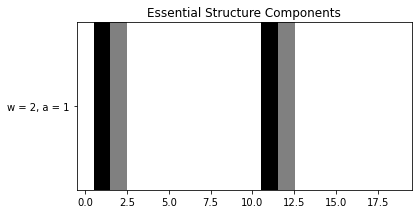

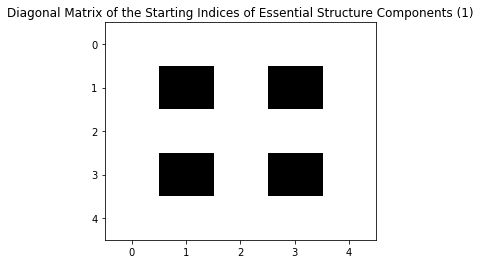

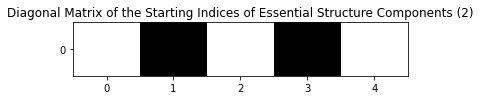

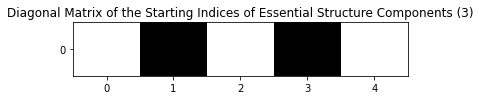

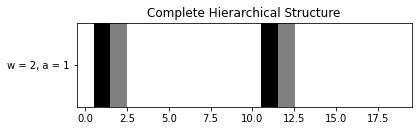

The binary matrix representation for the full_matrix_no is: 
 [[0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]]
The vector containing the lengths of the hierarchical structure encoded in full_matrix_no is: 
 [[2]]
The binary matrix with 1's where hierarchical structure begins and 0's otherwise is: 
 [[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]
The vector containing the annotation markers of the hierarchical structure encoded in each row 
 of full_matrix_no is: 
 [1]


In [7]:
output = hierarchical_structure(matrix_no_overlaps, key_no_overlaps, sn, vis=True)

full_visualization = output[0]
full_key = output[1]
full_matrix_no = output[2]
full_anno_lst = output[3]

print("The binary matrix representation for the full_matrix_no is: \n", full_visualization)
print("The vector containing the lengths of the hierarchical structure encoded in full_matrix_no is: \n", full_key)
print("The binary matrix with 1's where hierarchical structure begins and 0's otherwise is: \n", full_matrix_no)
print("The vector containing the annotation markers of the hierarchical structure encoded in each row \n of full_matrix_no is: \n", full_anno_lst)